<a href="https://colab.research.google.com/github/pepetonof/UX-DL/blob/main/UX_DL_claseMuestra_Ejc1_CompuertasLogicasPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

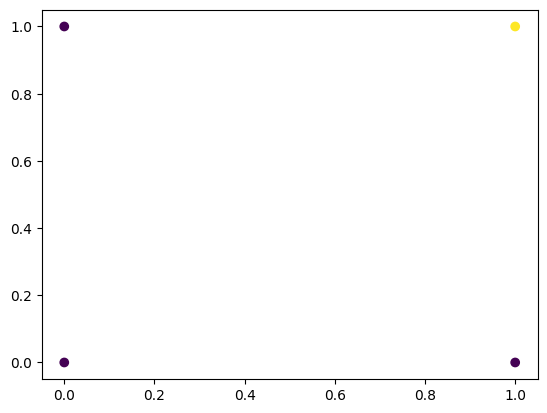

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Salida esperada AND

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # Salida esperada XOR

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
X, y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 1,
    class_sep = 0.5
)

X = MinMaxScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

Exactitud 1.0


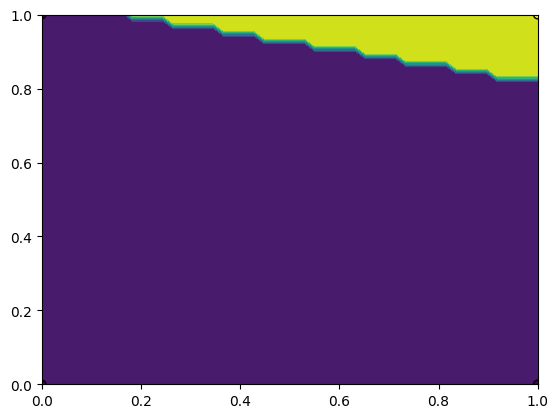

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

def perceptron_lr(Xtr, ytr, epochs = 100, w = None):
    rows = Xtr.shape[0]
    dim = Xtr.shape[1] + 1
    ext = np.ones((rows, 1))
    eXtr = np.hstack((Xtr, ext))
    w = np.random.uniform(low = 0, high = 1, size = dim) if w is None else w

    for it in range(epochs):
        ord = np.random.choice(a = range(rows), size = rows, replace = False)
        chng = 0
        for o in ord:
            dp = np.dot(eXtr[o], w)
            if ytr[o] == 1 and dp <= 0:
                chng += 1
                w += eXtr[o]
            elif ytr[o] == 0 and dp >= 0:
                chng += 1
                w -= eXtr[o]
        if chng == 0:
            break
    return w

def perceptron(X, w):
    rows = X.shape[0]
    ext = np.ones((rows, 1))
    eX = np.hstack((X, ext))
    y_hat = np.zeros(rows)

    for i, x in enumerate(eX):
        y_hat[i] = 1 if np.dot(x, w) >= 0 else 0

    return y_hat

w = perceptron_lr(X, y)

print('Exactitud {}'.format(accuracy_score(y, perceptron(X,w))))

def plot_perceptron_boundary_dec(w, X, y):
    feature_1, feature_2 = np.meshgrid(
        np.linspace(0, 1),
        np.linspace(0, 1))

    grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

    pred = perceptron(grid, w)
    pred = np.reshape(pred, feature_1.shape)
    display = DecisionBoundaryDisplay(
        xx0=feature_1, xx1=feature_2, response=pred)
    display.plot()
    display.ax_.scatter(
        X[:, 0], X[:, 1], c=y, edgecolor="black"
    )
    plt.show()

plot_perceptron_boundary_dec(w, X, y)